# Tasks

## Task 6.1: Download the 'Tweets' dataset from Canvas. Classify the sentiments in the dataset using six classifiers and calculate all evaluation metrics.
## NOTE: If the running time is too long, you can reduce the number of samples.
## NOTE: You should comment on your code and explain what each part is doing

In [1]:
# import necessary libraries and install modules
import pandas as pd
import string
import re
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
!pip install textblob
from textblob import TextBlob


In [2]:
#import the dataset
tweet_data = pd.read_csv('Tweets.csv')

In [3]:
#view first five rows
tweet_data.head()

,sentiment,tweet
0,0,Eating a gyro for breakfast at the airport. Pr...
1,1,Well .. .you fall of the 'horse' and get strai...
2,0,thanks for the responses but when is it really...
3,0,depressed.! fuuck my life!
4,1,"is LMAO, just thinkin of the 80/20 rule.....wo..."


In [4]:
#drop null values
tweet_data.dropna(inplace=True)

In [5]:
#convert to lowercase
#tweet_data['lower'] = tweet_data['tweet'].apply(lambda x: " ".join(x.lower()  for x in x.split()))

In [6]:
tweet_data.head()

,sentiment,tweet
0,0,Eating a gyro for breakfast at the airport. Pr...
1,1,Well .. .you fall of the 'horse' and get strai...
2,0,thanks for the responses but when is it really...
3,0,depressed.! fuuck my life!
4,1,"is LMAO, just thinkin of the 80/20 rule.....wo..."


In [7]:
#check size of data
tweet_data.shape

(40000, 2)

In [8]:
#reduce size by creating randaom sample
tweet_data = tweet_data.sample(n=10000, random_state = 48)
tweet_data.reset_index(drop=True, inplace=True)

In [9]:
#check size of data
tweet_data.shape

(10000, 2)

In [10]:
# Imports neccessary library
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
%matplotlib notebook


In [11]:
# Visualize Product Scores
fig = px.histogram(tweet_data, x="sentiment")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

The resulting plot shows the sentiment distribution in the tweet_data with count of 4996 for negative and 5004 postive 

In [12]:
#import NLTK and Wordcloud Libraries
import nltk
from nltk.corpus import stopwords
!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS


In [13]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

In [14]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
tweet_data['tweet'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

0       brad fast is my favorit person to hang out wit...
1             it' not what you said, it' how you said it!
2       russel invit me to drayton manor on tuesday wi...
3       @twititcherish i don't know if she like the li...
4       today = lazy, mayb a gym session. tomorrow = b...
                              ...                        
9995     @gocheeksgo harr. subtleti is lost on me tonight
9996    i wa actual happi to see that leader of both n...
9997    @turtlescanrun veri nice pace, esp. in the hea...
9998             wait at broadoak-onli two more befor us!
9999    @sparklymegz i ment like physic there! i miss ...
Name: tweet, Length: 10000, dtype: object

In [15]:
tweet_data

,sentiment,tweet
0,1,Brad Fastings is my favorite person to hang ou...
1,0,"It's not what you said, it's how you said it!"
2,1,Russell invited me to Drayton Manor on Tuesday...
3,0,@TwitItCherish I don't know if she likes the l...
4,1,"Today = Lazy, maybe a gym session. Tomorrow = ..."
...,...,...
9995,0,@GoCheeksGo harr. subtlety is lost on me toni...
9996,0,I was actually happy to see that leaders of bo...
9997,1,"@turtlescanrun VERY nice pace, esp. in the hea..."
9998,1,Waiting at broadoak-only two more before us!


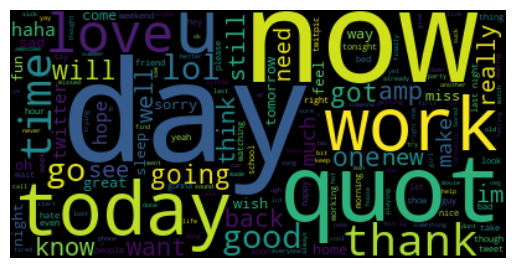

In [16]:
#creating word cloud from tweet column
textt = " ".join(tweet for tweet in tweet_data.tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
%matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

In [17]:
# split tweet data - positive and negative sentiment:
positive = tweet_data[tweet_data['sentiment'] == 1]
negative = tweet_data[tweet_data['sentiment'] == 0]

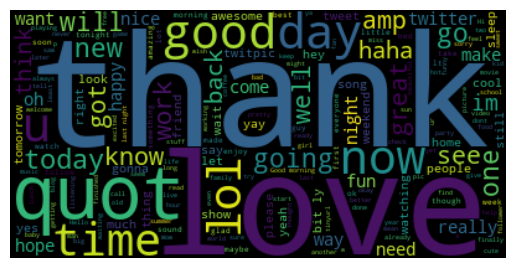

In [18]:
# Visualize postive Wordcloud 
pos = " ".join(tweet for tweet in positive.tweet)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

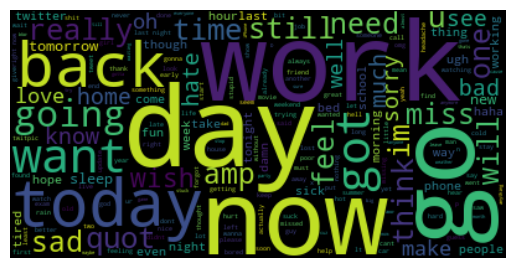

In [19]:
# word cloud negative
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","lol"])


## good and lol removed because they were included in positive sentiment
neg = " ".join(tweet for tweet in negative.tweet)
wordcloud_neg = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# review and visualize distribution
tweet_data['sentimentt'] = tweet_data['sentiment'].replace({0 : 'negative'})
tweet_data['sentimentt'] = tweet_data['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(tweet_data, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [21]:
# count occurrences of each sentiment type
sentiment_counts = tweet_data['sentiment'].value_counts()

# display counts
print(sentiment_counts)

sentiment
1    5004
0    4996
Name: count, dtype: int64


In [22]:
# Removing punctuation using string method
import string
string.punctuation
tweet_data['tweet']=tweet_data['tweet'].apply(lambda x:''.join(i for i in x if i not in string.punctuation))

In [23]:
# Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
tweet_data['tweet']=tweet_data.tweet.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\opeol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Extracting input and output
X=tweet_data['tweet']
y=tweet_data['sentiment']

In [25]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(X)

In [26]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
# Step 1: defining the classification models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()
NB = GaussianNB()
LR = LogisticRegression()

In [28]:
# Step 2: training the models
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
LR.fit(X_train,y_train)
NB.fit(X_train.toarray(),y_train)

GaussianNB()

In [29]:
#Step 3: prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)
y_pred5=LR.predict(X_test)
y_pred6=NB.predict(X_test.toarray())

In [30]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

Text(0.5, 1.0, 'NB')

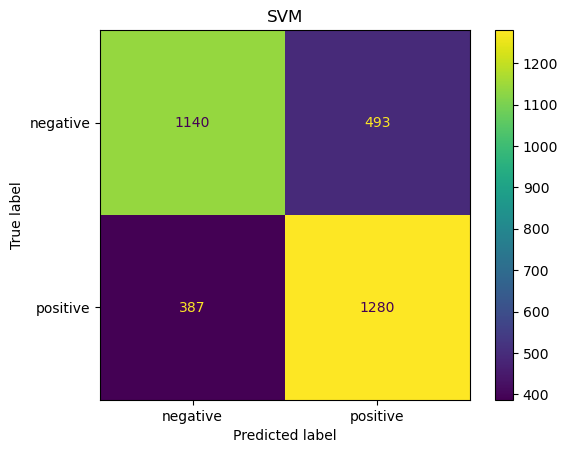

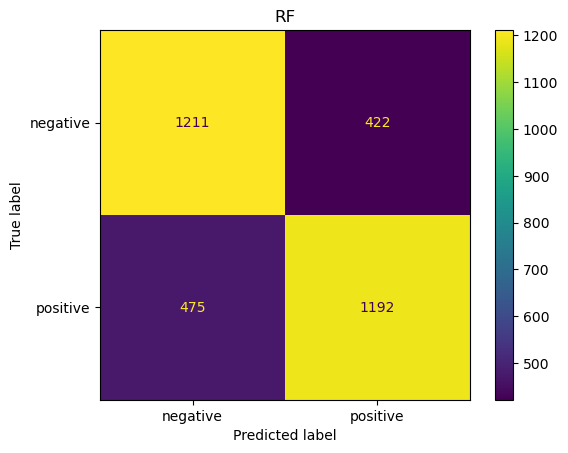

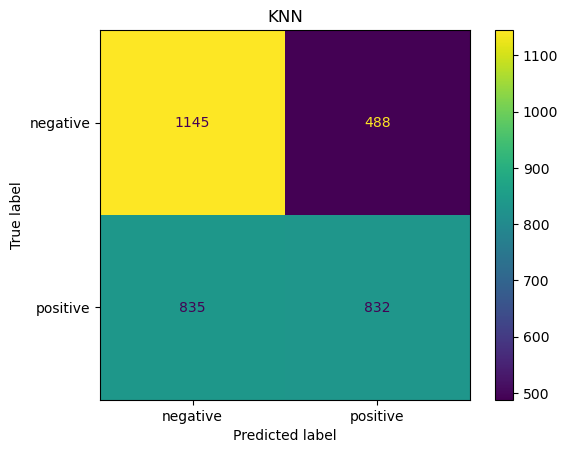

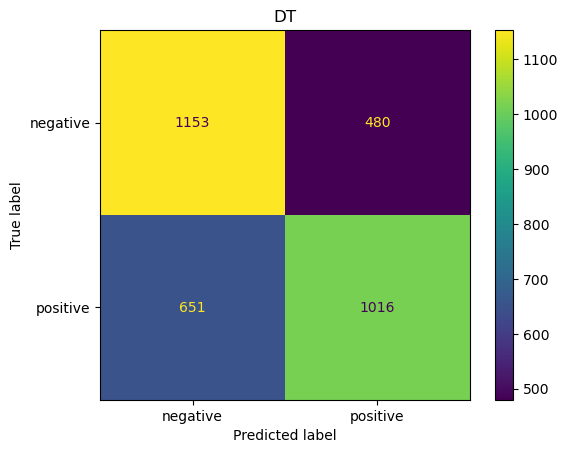

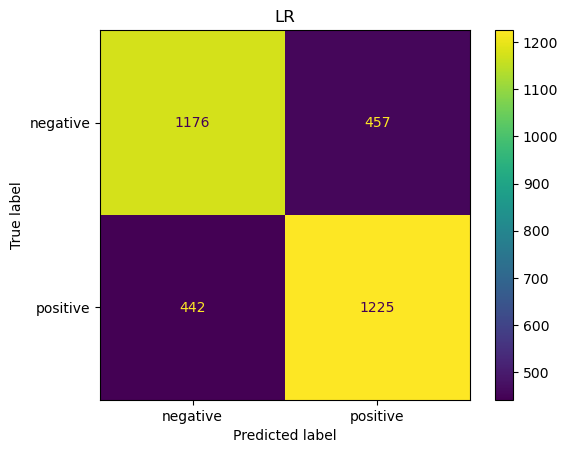

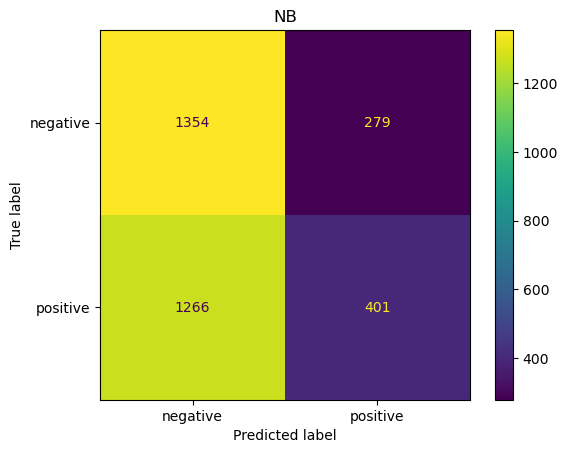

In [31]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=['negative', 'positive'])
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=['negative', 'positive'])
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=['negative', 'positive'])
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=['negative', 'positive'])
disp.plot()
plt.title("DT")

cm5 = confusion_matrix(y_test, y_pred5, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=['negative', 'positive'])
disp.plot()
plt.title("LR")

cm6 = confusion_matrix(y_test, y_pred6, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=['negative', 'positive'])
disp.plot()
plt.title("NB")

In [32]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')
print('LR metrics\n')
confusion_metrics(cm5)
print('\n\n')
print('NB metrics\n')
confusion_metrics(cm6)
print('\n\n')

SVM metrics

True Positives: 1280
True Negatives: 1140
False Positives: 493
False Negatives: 387
--------------------------------------------------
Accuracy: 0.73
Mis-Classification: 0.27
Sensitivity: 0.77
Specificity: 0.7
Precision: 0.7
f_1 Score: 0.73



RF metrics

True Positives: 1192
True Negatives: 1211
False Positives: 422
False Negatives: 475
--------------------------------------------------
Accuracy: 0.73
Mis-Classification: 0.27
Sensitivity: 0.72
Specificity: 0.74
Precision: 0.74
f_1 Score: 0.73



KNN metrics

True Positives: 832
True Negatives: 1145
False Positives: 488
False Negatives: 835
--------------------------------------------------
Accuracy: 0.6
Mis-Classification: 0.4
Sensitivity: 0.5
Specificity: 0.7
Precision: 0.7
f_1 Score: 0.58



DT metrics

True Positives: 1016
True Negatives: 1153
False Positives: 480
False Negatives: 651
--------------------------------------------------
Accuracy: 0.66
Mis-Classification: 0.34
Sensitivity: 0.61
Specificity: 0.71
Precision

word count: 19